In [1]:
import pandas as pd
import requests
import json
import sqlite3
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re as re
import seaborn as sns
from ast import literal_eval

In [2]:
con= sqlite3.connect('test')

In [3]:
df = pd.read_csv("complete_anilist.csv")
df

,id,type,format,status,seasonYear,source,genres,popularity,tags,title.english,title.romaji
0,1,ANIME,TV,FINISHED,1998.0,ORIGINAL,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",380694,"[{'name': 'Space'}, {'name': 'Crime'}, {'name'...",Cowboy Bebop,Cowboy Bebop
1,5,ANIME,MOVIE,FINISHED,2001.0,ORIGINAL,"['Action', 'Drama', 'Mystery', 'Sci-Fi']",70431,"[{'name': 'Terrorism'}, {'name': 'Primarily Ad...",Cowboy Bebop: The Movie - Knockin' on Heaven's...,Cowboy Bebop: Tengoku no Tobira
2,6,ANIME,TV,FINISHED,1998.0,MANGA,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",136780,"[{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...",Trigun,TRIGUN
3,7,ANIME,TV,FINISHED,2002.0,ORIGINAL,"['Action', 'Drama', 'Mystery', 'Supernatural']",18663,"[{'name': 'Conspiracy'}, {'name': 'Police'}, {...",Witch Hunter ROBIN,Witch Hunter ROBIN
4,8,ANIME,TV,FINISHED,2004.0,MANGA,"['Adventure', 'Fantasy', 'Supernatural']",2614,"[{'name': 'Shounen'}, {'name': 'Spearplay'}, {...",Beet the Vandel Buster,Bouken Ou Beet
...,...,...,...,...,...,...,...,...,...,...,...
18386,186761,ANIME,MOVIE,FINISHED,NaN,OTHER,"['Comedy', 'Drama']",3,[],NaN,Ban Ye Ji Jiao
18387,186762,ANIME,MOVIE,FINISHED,NaN,OTHER,['Comedy'],4,[],NaN,Cao Chong Cheng Xiang
18388,186763,ANIME,MOVIE,FINISHED,NaN,OTHER,"['Drama', 'Fantasy']",4,[{'name': 'Dragons'}],NaN,Diao Long Ji
18389,186764,ANIME,MOVIE,FINISHED,2024.0,NaN,['Fantasy'],138,"[{'name': 'Virtual World'}, {'name': 'Female P...",NaN,SINoALICE: Ichiban Saigo no Monogatari


In [32]:
my_df = pd.read_csv('my_anilist.csv')
my_df

,mediaId,media.title.english
0,21711,91 Days
1,9776,A-Channel
2,8101,Hen Zemi
3,20785,Absolute Duo
4,21823,ACCA: 13-Territory Inspection Dept.
...,...,...
1280,112153,Pokémon Journeys: The Series
1281,103301,ENDRO!
1282,103638,Case File nº221: Kabukicho
1283,103222,Magical Girl Spec-Ops Asuka


In [5]:
my_df.isnull().sum()

mediaId                0
media.title.english    0
dtype: int64

In [6]:
def clean_list(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df.format != "MOVIE") & (df.format != "SPECIAL") & (df.format != "MUSIC") & (df.format != "TV_SHORT") & (df.format.notnull())] #remove unnecesary formats
    df['title.english'] = df['title.english'].fillna(df['title.romaji'])  #clean english title
    df_2 = df.dropna(subset=['seasonYear'])
    df_2 = df_2.drop(['title.romaji','status','type'],axis=1) #drop romaji title
    df_2['source'] = df_2['source'].fillna('OTHER') #replace unknown source with "OTHER"
    df_2['seasonYear'] = df_2['seasonYear'].astype(int)
    df_2.rename(columns={'title.english' : 'Title'}, inplace=True)    
    df_2.rename(columns={'seasonYear' : 'Year'}, inplace=True)
    df_2.columns = df_2.columns.str.capitalize()
    return df_2

In [7]:
df_1 = clean_list(df)

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_12792\1070474332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title.english'] = df['title.english'].fillna(df['title.romaji'])  #clean english title


In [8]:
#df_1.rename(columns={'title.english' : 'Title'}, inplace=True)
df_1

,Id,Format,Year,Source,Genres,Popularity,Tags,Title
0,1,TV,1998,ORIGINAL,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",380694,"[{'name': 'Space'}, {'name': 'Crime'}, {'name'...",Cowboy Bebop
2,6,TV,1998,MANGA,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",136780,"[{'name': 'Guns'}, {'name': 'Fugitive'}, {'nam...",Trigun
3,7,TV,2002,ORIGINAL,"['Action', 'Drama', 'Mystery', 'Supernatural']",18663,"[{'name': 'Conspiracy'}, {'name': 'Police'}, {...",Witch Hunter ROBIN
4,8,TV,2004,MANGA,"['Adventure', 'Fantasy', 'Supernatural']",2614,"[{'name': 'Shounen'}, {'name': 'Spearplay'}, {...",Beet the Vandel Buster
5,15,TV,2005,MANGA,"['Action', 'Comedy', 'Sports']",29079,"[{'name': 'American Football'}, {'name': 'Shou...",Eyeshield 21
...,...,...,...,...,...,...,...,...
18293,185642,ONA,2023,ORIGINAL,"['Horror', 'Supernatural']",90,[],Nanashi Kaidan 2nd Season
18294,185644,TV,2024,OTHER,"['Comedy', 'Fantasy', 'Mystery']",22,[],Oshiri Tantei 8
18299,185669,ONA,2024,ORIGINAL,"['Horror', 'Supernatural']",70,[],Nanashi Kaidan 3rd Season
18367,186207,ONA,2025,ORIGINAL,['Slice of Life'],290,[{'name': 'School'}],Itsuka no Watashi yori


In [9]:
df_1.isnull().sum()

Id            0
Format        0
Year          0
Source        0
Genres        0
Popularity    0
Tags          0
Title         0
dtype: int64

In [10]:
df_1.loc[df_1['Year'] > 2004]

,Id,Format,Year,Source,Genres,Popularity,Tags,Title
5,15,TV,2005,MANGA,"['Action', 'Comedy', 'Sports']",29079,"[{'name': 'American Football'}, {'name': 'Shou...",Eyeshield 21
6,16,TV,2005,MANGA,"['Comedy', 'Drama', 'Romance', 'Slice of Life']",50455,"[{'name': 'Coming of Age'}, {'name': 'Josei'},...",Honey and Clover
16,27,TV,2005,LIGHT_NOVEL,"['Action', 'Drama', 'Horror', 'Sci-Fi', 'Super...",23424,"[{'name': 'Vampire'}, {'name': 'Male Protagoni...",Trinity Blood
30,50,TV,2005,MANGA,"['Comedy', 'Romance', 'Supernatural']",21661,"[{'name': 'Magic'}, {'name': 'Primarily Female...",Oh! My Goddess (TV)
45,65,TV,2005,MANGA,"['Action', 'Comedy', 'Drama']",14749,"[{'name': 'Battle Royale'}, {'name': 'Magic'},...",Rozen Maiden: Dreaming
...,...,...,...,...,...,...,...,...
18287,185541,ONA,2024,ORIGINAL,['Adventure'],124,[],Future Folktales Season 2
18293,185642,ONA,2023,ORIGINAL,"['Horror', 'Supernatural']",90,[],Nanashi Kaidan 2nd Season
18294,185644,TV,2024,OTHER,"['Comedy', 'Fantasy', 'Mystery']",22,[],Oshiri Tantei 8
18299,185669,ONA,2024,ORIGINAL,"['Horror', 'Supernatural']",70,[],Nanashi Kaidan 3rd Season


In [11]:
df_1.to_sql('anilist', con, if_exists='replace', index=False)

7330

In [12]:
my_df.to_sql('myanilist', con, if_exists='replace',index=False)

1285

In [ ]:
select_source = pd.read_sql_query(
    '''
    SELECT a.Id, a.Title, a.Year, a.Source
    FROM anilist AS a
    RIGHT JOIN myanilist AS m
    ON a.id = m.mediaId
    WHERE Year > 2004 AND Year <= 2024;
    ''',
    con
)

In [96]:
select_source

,Id,Title,Year,Source
0,79,SHUFFLE!,2005,VISUAL_NOVEL
1,101,Air,2005,VISUAL_NOVEL
2,184,Xenosaga: The Animation,2005,VIDEO_GAME
3,291,D.C.S.S. ~Da Capo Second Season~,2005,VISUAL_NOVEL
4,355,Shakugan no Shana,2005,LIGHT_NOVEL
...,...,...,...,...
1246,176311,Blue Exorcist -Beyond the Snow Saga-,2024,MANGA
1247,176660,Sengoku Youko: The Thousandfold Chaos Arc,2024,MANGA
1248,177104,"The Most Notorious ""Talker"" Runs the World's G...",2024,LIGHT_NOVEL
1249,178434,"As a Reincarnated Aristocrat, I'll Use My Appr...",2024,LIGHT_NOVEL


In [95]:
select_source = select_source.dropna()
select_source

,Id,Title,Year,Source
0,79,SHUFFLE!,2005,VISUAL_NOVEL
1,101,Air,2005,VISUAL_NOVEL
2,184,Xenosaga: The Animation,2005,VIDEO_GAME
3,291,D.C.S.S. ~Da Capo Second Season~,2005,VISUAL_NOVEL
4,355,Shakugan no Shana,2005,LIGHT_NOVEL
...,...,...,...,...
1246,176311,Blue Exorcist -Beyond the Snow Saga-,2024,MANGA
1247,176660,Sengoku Youko: The Thousandfold Chaos Arc,2024,MANGA
1248,177104,"The Most Notorious ""Talker"" Runs the World's G...",2024,LIGHT_NOVEL
1249,178434,"As a Reincarnated Aristocrat, I'll Use My Appr...",2024,LIGHT_NOVEL


In [16]:
select_source.loc[select_source['Year'] > 2004]
#source_df = select_source[select_source['Year'] <= 2024]

,Id,Title,Year,Source
0,79,SHUFFLE!,2005,VISUAL_NOVEL
1,101,Air,2005,VISUAL_NOVEL
2,184,Xenosaga: The Animation,2005,VIDEO_GAME
3,291,D.C.S.S. ~Da Capo Second Season~,2005,VISUAL_NOVEL
4,355,Shakugan no Shana,2005,LIGHT_NOVEL
...,...,...,...,...
1246,176311,Blue Exorcist -Beyond the Snow Saga-,2024,MANGA
1247,176660,Sengoku Youko: The Thousandfold Chaos Arc,2024,MANGA
1248,177104,"The Most Notorious ""Talker"" Runs the World's G...",2024,LIGHT_NOVEL
1249,178434,"As a Reincarnated Aristocrat, I'll Use My Appr...",2024,LIGHT_NOVEL


In [17]:
source_sum  = select_source.groupby('Source').Title.count()
source_sum

Source
LIGHT_NOVEL     412
MANGA           503
ORIGINAL        162
OTHER            72
VIDEO_GAME       40
VISUAL_NOVEL     62
Name: Title, dtype: int64

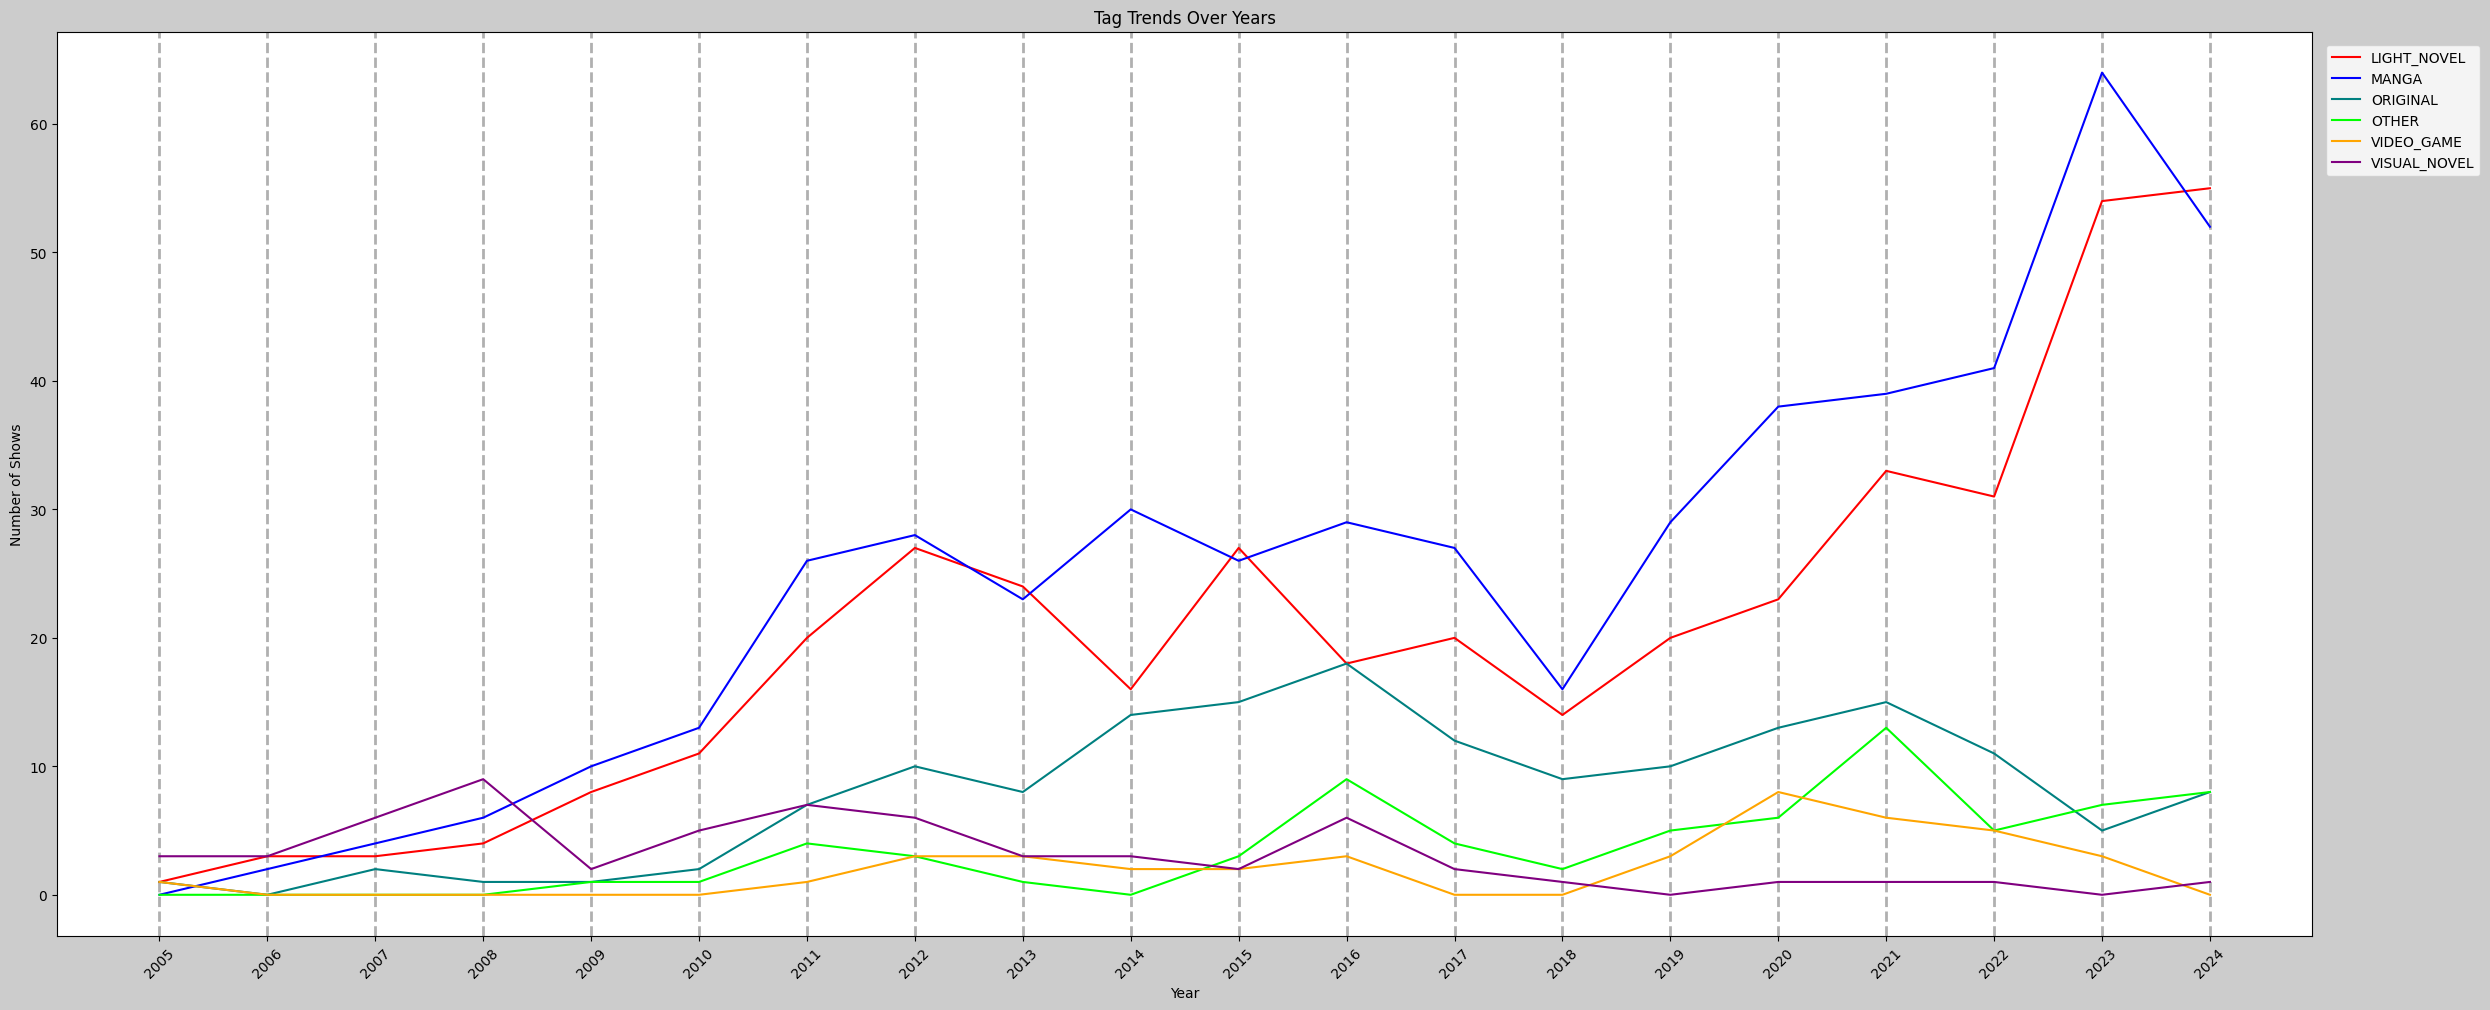

In [18]:
# Pivot the data to have genres as columns and years as index
source_trends = select_source.pivot_table(values='Title', index='Year', columns='Source', aggfunc='count', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(source_trends.columns):
    plt.plot(source_trends.index, source_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Tag Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Due to potentially many genres, you might want to consider rotating x labels for better visibility
plt.xticks(range(min(source_trends.index), max(source_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [19]:
df_2 = df_1[(df_1['Year'] > 2004) & (df_1['Year'] <= 2024)]
df_2

,Id,Format,Year,Source,Genres,Popularity,Tags,Title
5,15,TV,2005,MANGA,"['Action', 'Comedy', 'Sports']",29079,"[{'name': 'American Football'}, {'name': 'Shou...",Eyeshield 21
6,16,TV,2005,MANGA,"['Comedy', 'Drama', 'Romance', 'Slice of Life']",50455,"[{'name': 'Coming of Age'}, {'name': 'Josei'},...",Honey and Clover
16,27,TV,2005,LIGHT_NOVEL,"['Action', 'Drama', 'Horror', 'Sci-Fi', 'Super...",23424,"[{'name': 'Vampire'}, {'name': 'Male Protagoni...",Trinity Blood
30,50,TV,2005,MANGA,"['Comedy', 'Romance', 'Supernatural']",21661,"[{'name': 'Magic'}, {'name': 'Primarily Female...",Oh! My Goddess (TV)
45,65,TV,2005,MANGA,"['Action', 'Comedy', 'Drama']",14749,"[{'name': 'Battle Royale'}, {'name': 'Magic'},...",Rozen Maiden: Dreaming
...,...,...,...,...,...,...,...,...
18283,185463,ONA,2023,ORIGINAL,"['Drama', 'Psychological']",361,[],Artiswitch: Ruru's Episodes of Memories
18287,185541,ONA,2024,ORIGINAL,['Adventure'],124,[],Future Folktales Season 2
18293,185642,ONA,2023,ORIGINAL,"['Horror', 'Supernatural']",90,[],Nanashi Kaidan 2nd Season
18294,185644,TV,2024,OTHER,"['Comedy', 'Fantasy', 'Mystery']",22,[],Oshiri Tantei 8


In [20]:
df_2.groupby('Source').Title.count()

Source
LIGHT_NOVEL      672
MANGA           1888
ORIGINAL        1127
OTHER            651
VIDEO_GAME       388
VISUAL_NOVEL     190
Name: Title, dtype: int64

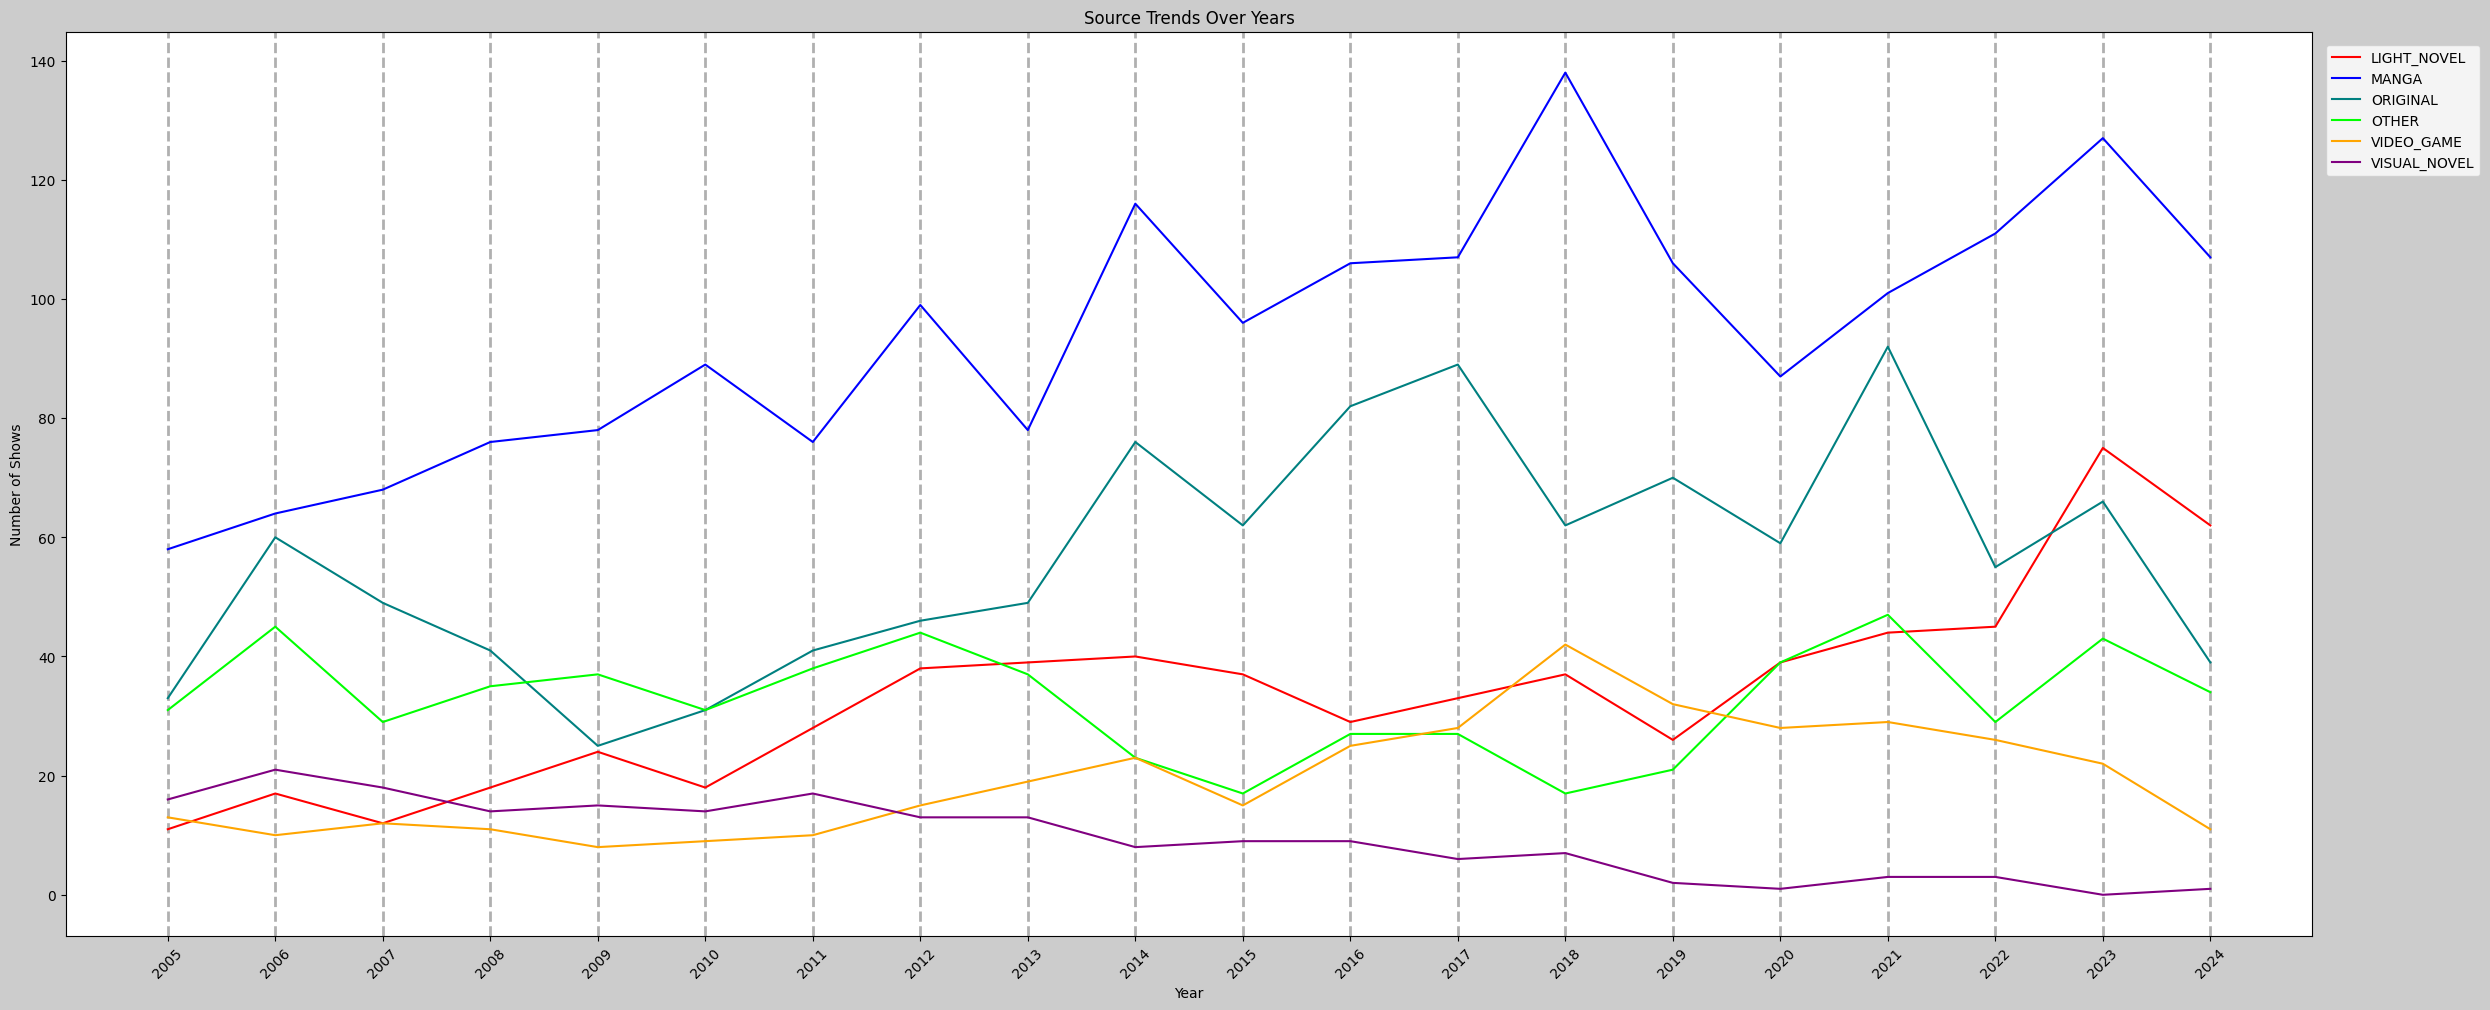

In [21]:
# Pivot the data to have genres as columns and years as index
source_trends = df_2.pivot_table(values='Title', index='Year', columns='Source', aggfunc='count', fill_value=0)
colors = ['#FF0000','#0000FF','#008080','#00FF00','#FFA500','#800080']#,'#A52A2A']#,'#FFC0CB']#,'#00FFFF','#00FF00','#008080','#FF00FF','#000080']
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(source_trends.columns):
    plt.plot(source_trends.index, source_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Source Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Due to potentially many genres, you might want to consider rotating x labels for better visibility
plt.xticks(range(min(source_trends.index), max(source_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
select_genre = pd.read_sql_query(
    '''
    SELECT a.Id, a.Title, a.Year, a.Genres
    FROM anilist AS a
    RIGHT JOIN myanilist AS m
    ON a.id = m.mediaId
    WHERE Year > 2004 AND Year <= 2024;
    ''',
    con
)

In [23]:
select_genre

,Id,Title,Year,Genres
0,79,SHUFFLE!,2005,"['Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Roman..."
1,101,Air,2005,"['Drama', 'Romance', 'Slice of Life', 'Superna..."
2,184,Xenosaga: The Animation,2005,"['Action', 'Mecha', 'Sci-Fi']"
3,291,D.C.S.S. ~Da Capo Second Season~,2005,"['Comedy', 'Drama', 'Romance', 'Supernatural']"
4,355,Shakugan no Shana,2005,"['Action', 'Comedy', 'Drama', 'Fantasy', 'Roma..."
...,...,...,...,...
1246,176311,Blue Exorcist -Beyond the Snow Saga-,2024,"['Action', 'Fantasy', 'Supernatural']"
1247,176660,Sengoku Youko: The Thousandfold Chaos Arc,2024,"['Action', 'Adventure', 'Fantasy']"
1248,177104,"The Most Notorious ""Talker"" Runs the World's G...",2024,"['Action', 'Adventure', 'Comedy', 'Fantasy', '..."
1249,178434,"As a Reincarnated Aristocrat, I'll Use My Appr...",2024,"['Adventure', 'Fantasy']"


In [24]:
select_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      1251 non-null   int64 
 1   Title   1251 non-null   object
 2   Year    1251 non-null   int64 
 3   Genres  1251 non-null   object
dtypes: int64(2), object(2)
memory usage: 39.2+ KB


In [25]:
select_genre['Genres'] = select_genre['Genres'].apply(literal_eval)

In [26]:
select_genre_2 = select_genre.explode('Genres')
select_genre_2

,Id,Title,Year,Genres
0,79,SHUFFLE!,2005,Comedy
0,79,SHUFFLE!,2005,Drama
0,79,SHUFFLE!,2005,Ecchi
0,79,SHUFFLE!,2005,Fantasy
0,79,SHUFFLE!,2005,Romance
...,...,...,...,...
1249,178434,"As a Reincarnated Aristocrat, I'll Use My Appr...",2024,Adventure
1249,178434,"As a Reincarnated Aristocrat, I'll Use My Appr...",2024,Fantasy
1250,178533,Ranma1/2 (2024),2024,Action
1250,178533,Ranma1/2 (2024),2024,Comedy


In [27]:
select_genre_2.groupby('Genres').Title.count()

Genres
Action           523
Adventure        271
Comedy           589
Drama            370
Ecchi            180
Fantasy          473
Horror            36
Mahou Shoujo      38
Mecha             53
Music             37
Mystery          148
Psychological    114
Romance          443
Sci-Fi           186
Slice of Life    362
Sports            38
Supernatural     262
Thriller          52
Name: Title, dtype: int64

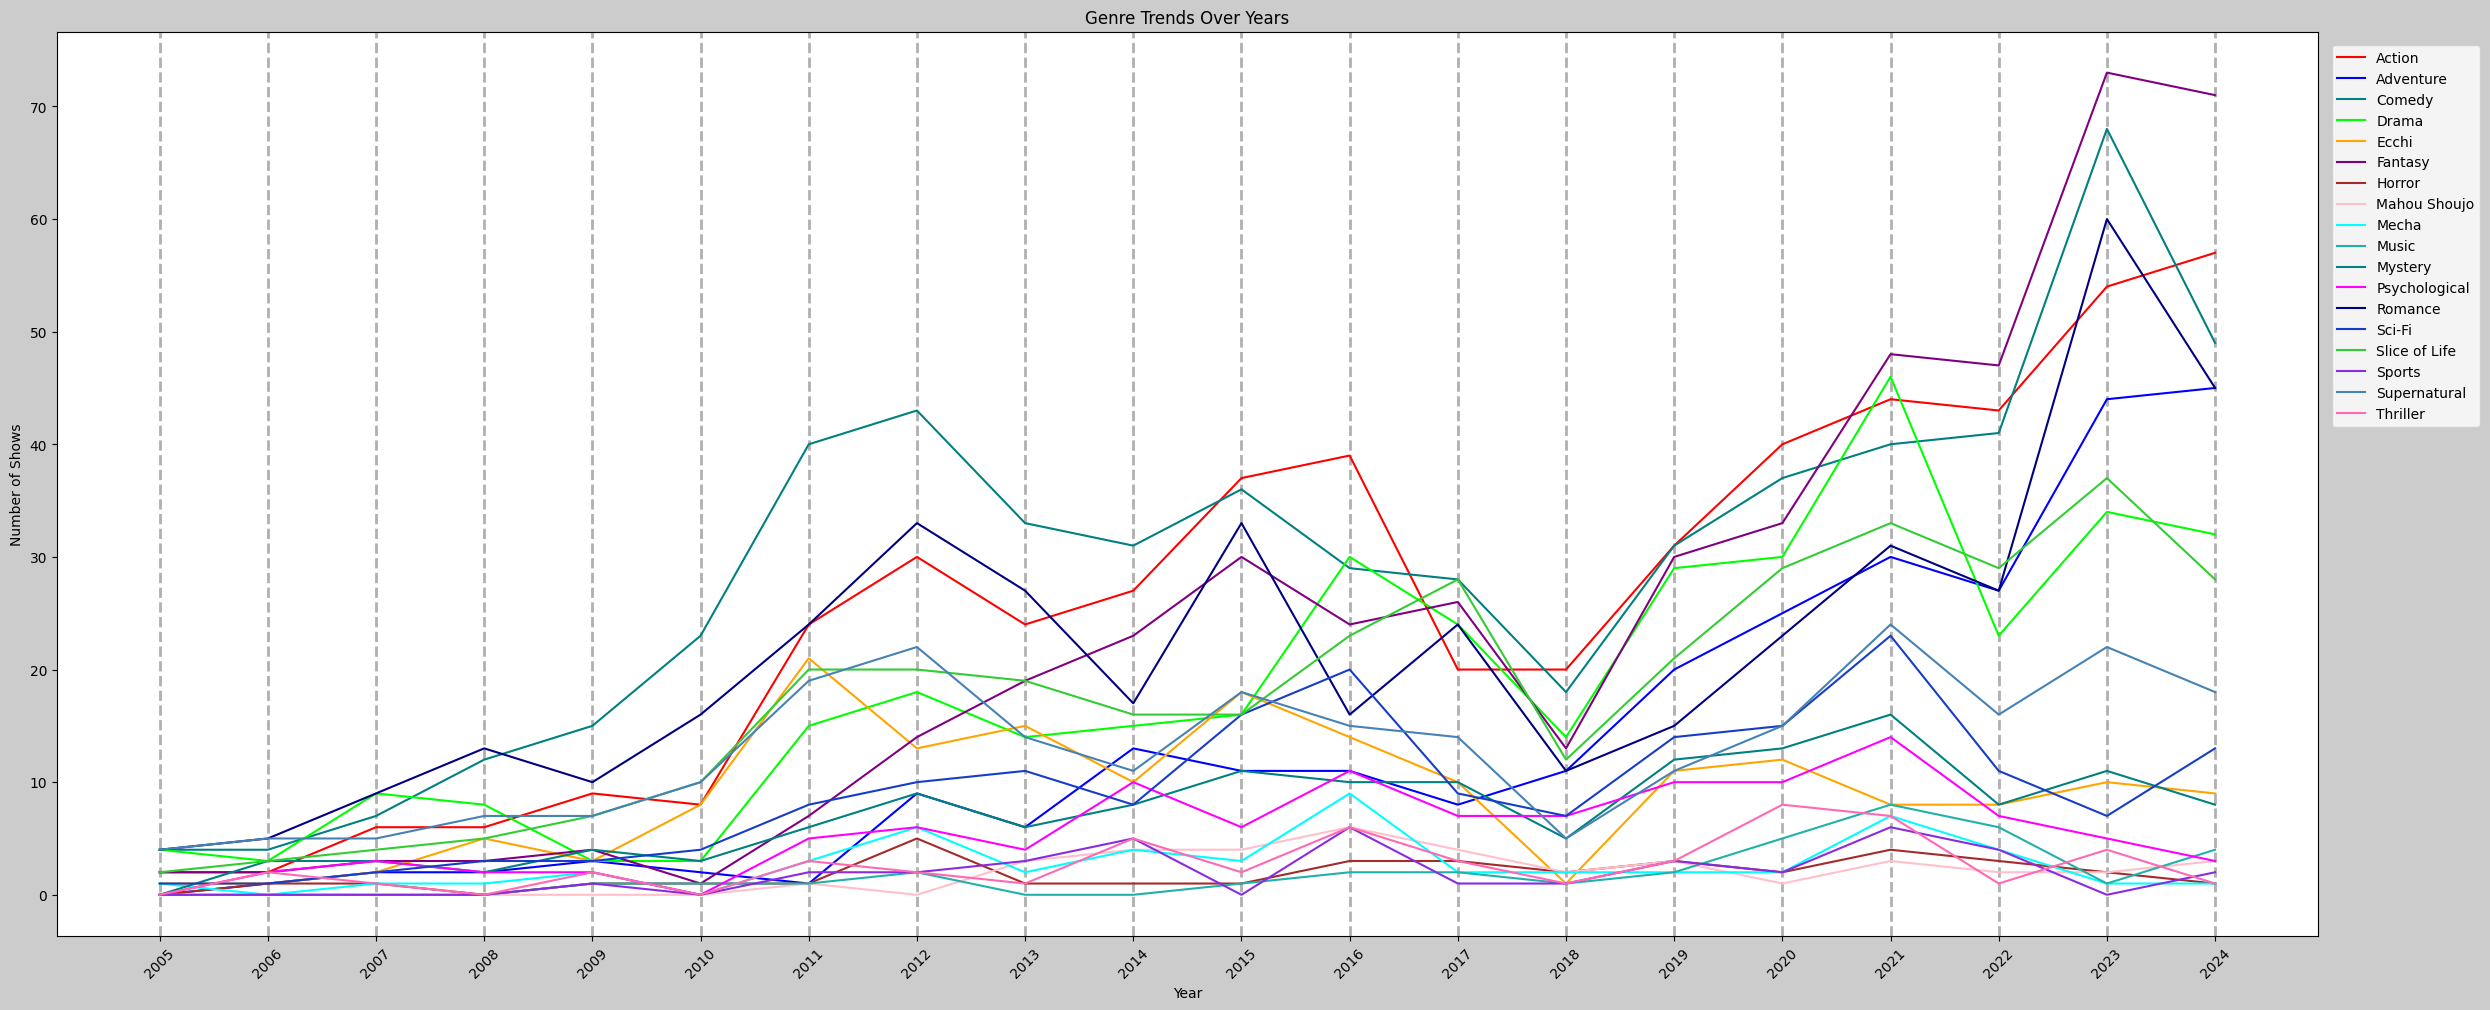

In [28]:
# Pivot the data to have genres as columns and years as index
genre_trends = select_genre_2.pivot_table(values='Title', index='Year', columns='Genres', aggfunc='count', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    '#20B2AA',
    '#008080',
    '#FF00FF',
    '#000080',
    '#173DC8',
    '#32CD32',
    '#8A2BE2',
    '#4682B4',
    '#FF69B4'
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(genre_trends.columns):
    plt.plot(genre_trends.index, genre_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Due to potentially many genres, you might want to consider rotating x labels for better visibility
plt.xticks(range(min(genre_trends.index), max(genre_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [29]:
df_2['Genres'] = df_2['Genres'].apply(literal_eval)

C:\Users\Leolion023\AppData\Local\Temp\ipykernel_12792\3972864473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Genres'] = df_2['Genres'].apply(literal_eval)


In [30]:
df_2 = df_2.explode('Genres')

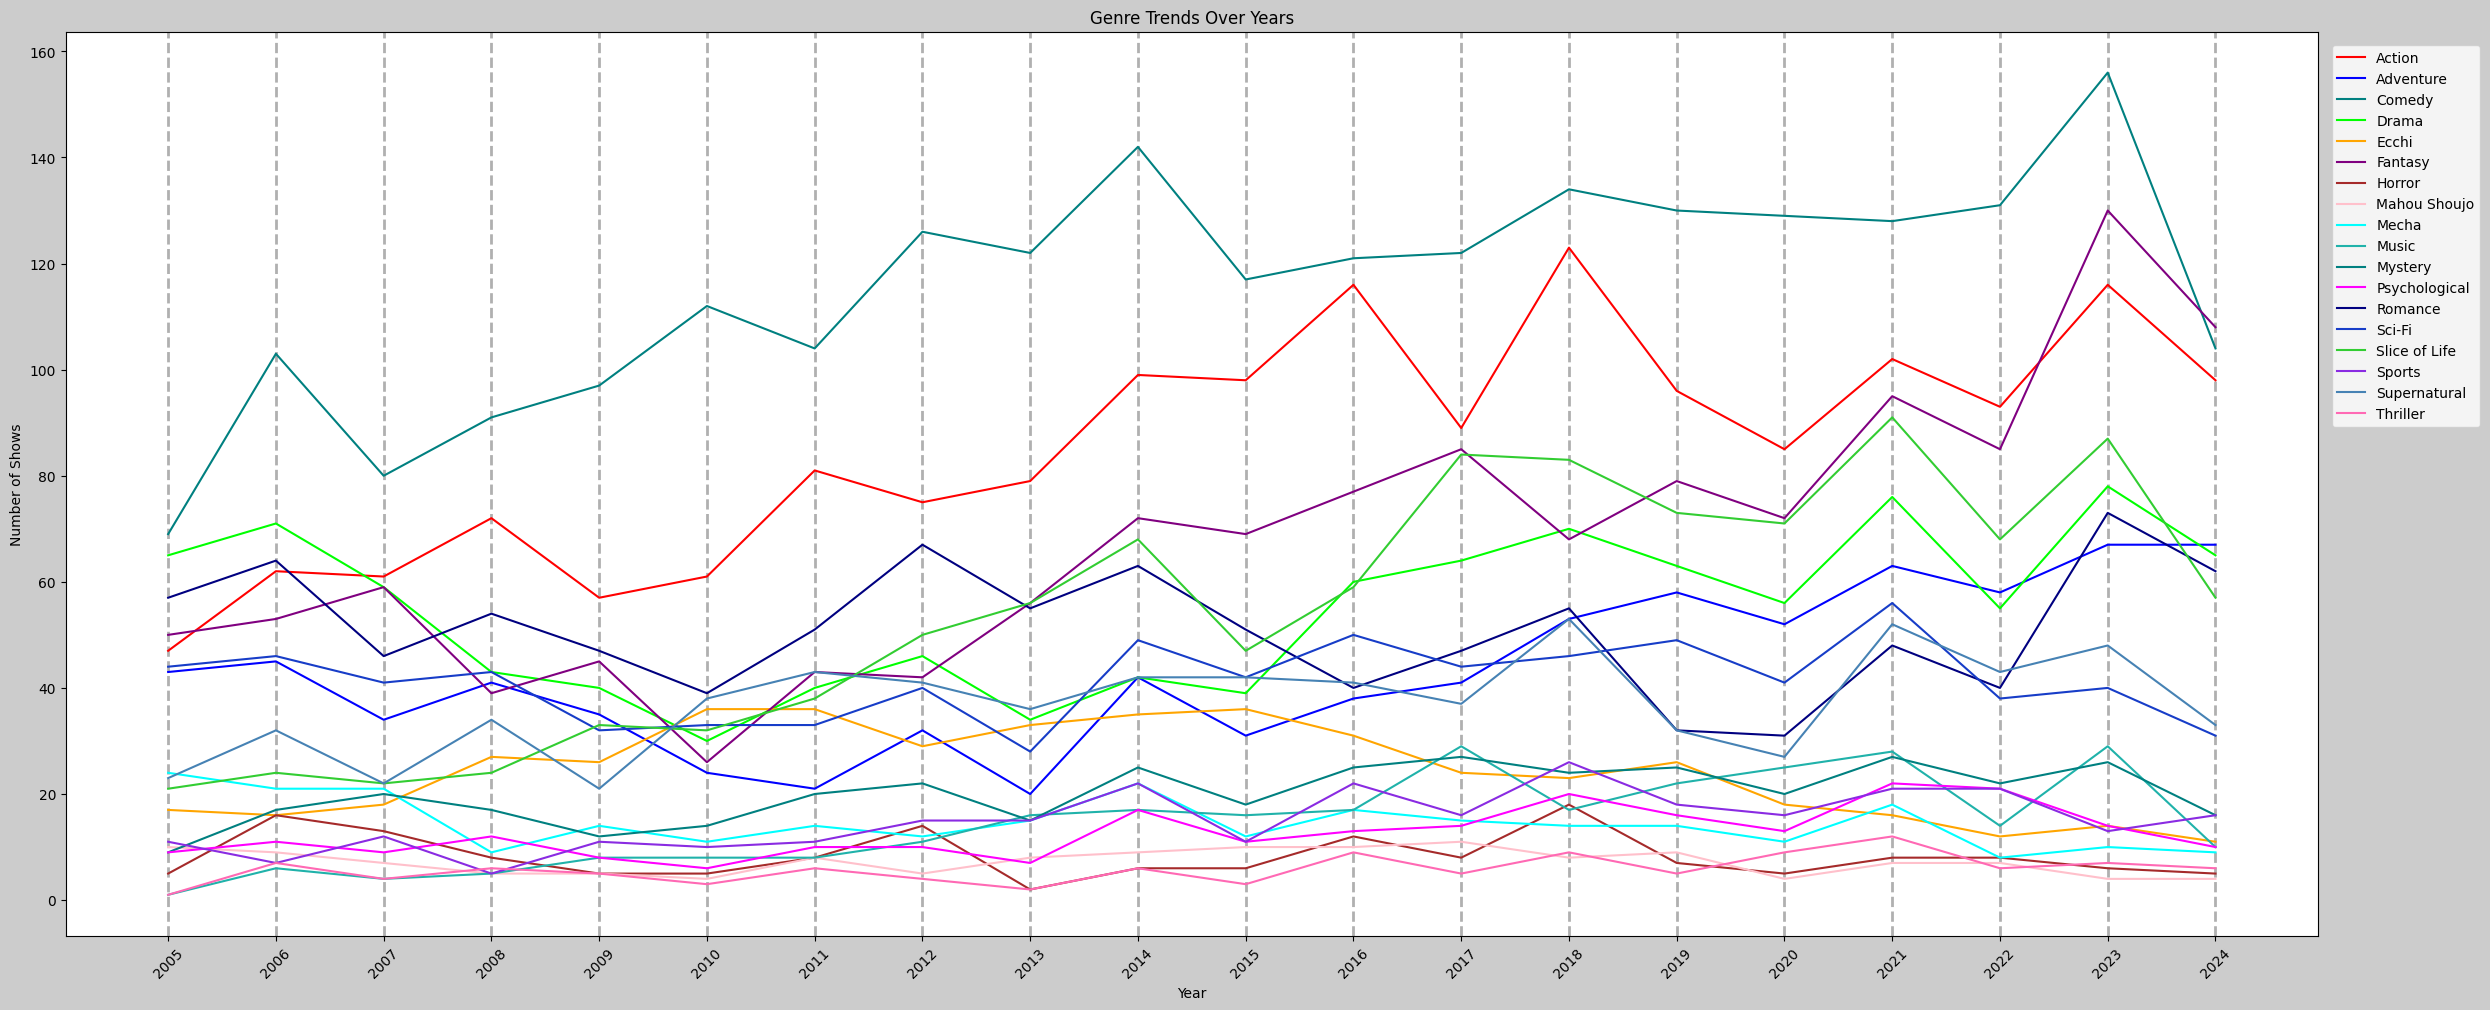

In [87]:
# Pivot the data to have genres as columns and years as index
genre_trends = df_2.pivot_table(values='Title', index='Year', columns='Genres', aggfunc='count', fill_value=0)
colors = [
    '#FF0000',
    '#0000FF',
    '#008080',
    '#00FF00',
    '#FFA500',
    '#800080',
    '#A52A2A',
    '#FFC0CB',
    '#00FFFF',
    '#20B2AA',
    '#008080',
    '#FF00FF',
    '#000080',
    '#173DC8',
    '#32CD32',
    '#8A2BE2',
    '#4682B4',
    '#FF69B4'
    ]
# Plotting
plt.figure(figsize=(25, 10),facecolor='#cccccc')

# Here we use line plot for each genre
for i,tag in enumerate(genre_trends.columns):
    plt.plot(genre_trends.index, genre_trends[tag], label=tag, color=colors[i % len(colors)])

plt.title('Genre Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1.)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=2)

# Adjust layout to prevent clipping of the legend
plt.tight_layout()

# Due to potentially many genres, you might want to consider rotating x labels for better visibility
plt.xticks(range(min(genre_trends.index), max(genre_trends.index) + 1))
plt.xticks(rotation=45)

# Show the plot
plt.show()